In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)

In [7]:
raw_data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [8]:
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(raw_data.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis = 1))

In [13]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis = 1).columns)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = scaled_data

In [16]:
y = raw_data['TARGET CLASS']

In [17]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model_k_1 = KNeighborsClassifier(n_neighbors = 1)

In [20]:
model_k_1.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
predictions_k_1 = model_k_1.predict(x_test_data)

In [22]:
from sklearn.metrics import classification_report

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
print(classification_report(y_test_data, predictions_k_1))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       137
           1       0.90      0.92      0.91       163

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [25]:
print(confusion_matrix(y_test_data, predictions_k_1))

[[121  16]
 [ 13 150]]


In [26]:
error_rates = []

In [27]:
for i in np.arange (1, 101) :
    # For this test, we must create a new instance of class KNeighborsClassifier from scikit-learn.
        # Specify the parameter n_neighbors with the K value of i.
    new_model = KNeighborsClassifier(n_neighbors = i)
    # Train the model by fitting it to our Training Data.
    new_model.fit(x_training_data, y_training_data)
    # Make predictions on the Test Data.
    new_predictions = new_model.predict(x_test_data)
    # Calculate the mean difference for every incorrect prediction. 
    error_rates.append(np.mean(new_predictions != y_test_data))

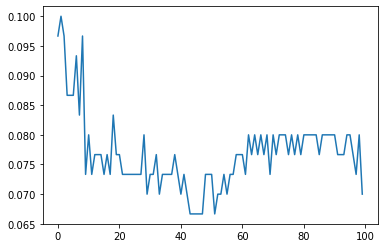

In [28]:
plt.plot(error_rates)

In [29]:
model_k_50 = KNeighborsClassifier(n_neighbors = 50)

In [30]:
model_k_50.fit(x_training_data, y_training_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [31]:
predictions_k_50 = model_k_50.predict(x_test_data)

In [32]:
print(classification_report(y_test_data, predictions_k_50))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       137
           1       0.92      0.95      0.93       163

    accuracy                           0.93       300
   macro avg       0.93      0.92      0.93       300
weighted avg       0.93      0.93      0.93       300



In [33]:
print(confusion_matrix(y_test_data, predictions_k_50))

[[123  14]
 [  8 155]]
